How are you feeling today? (happy / neutral / sad): happy
Enter today's date in this format: (dd/mm/yr) 26-11-2006


Your mood data has been saved for today!.

You have made 29 entries!



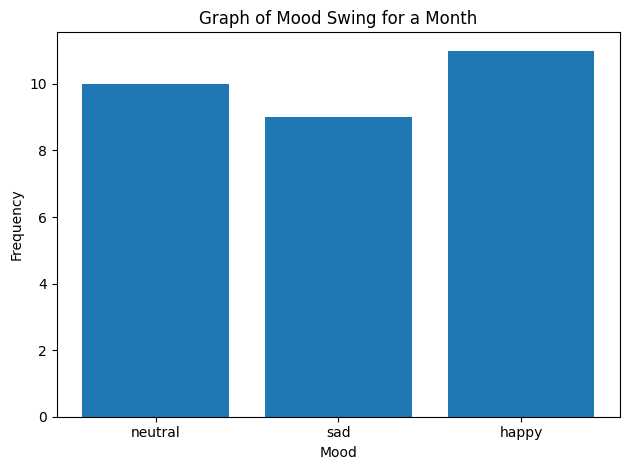

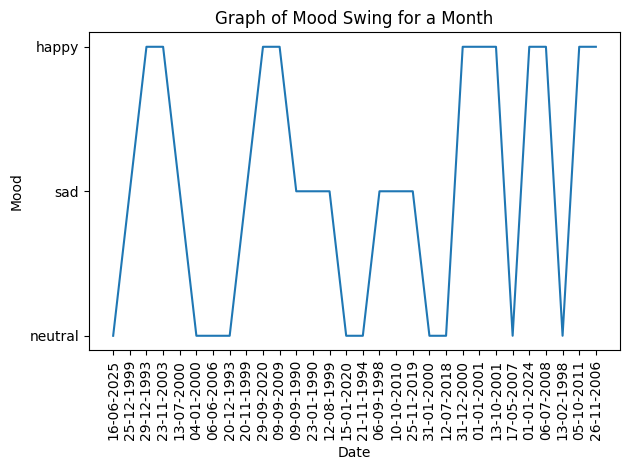

In [42]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import json

''''def date_list():

    # Define the start and end dates
    start_date = datetime(2024, 1, 1)
    end_date = datetime(2024, 1, 31)

    #Generate a list of dates
    dates = []
    current_date = start_date
    while current_date <= end_date:
        dates.append(current_date.strftime("%Y-%m-%d"))
        current_date += timedelta(days=1)

    return dates'''

def get_mood():
    mood_list = ['happy', 'neutral', 'sad']
    mood = input("How are you feeling today? (happy / neutral / sad):").strip().lower()
    while mood not in mood_list:
        mood = input("Please enter how you are feeling today? (happy / neutral / sad):").strip().lower()
    return mood

def get_date():
    date_string = input("Enter today's date in this format: (dd/mm/yr)")
    date_object = datetime.strptime(date_string, "%d-%m-%Y")
    return date_string

def create_dict(date, mood):
    mood_dict = {}
    mood_dict[mood] = date
    return mood_dict
    
def open_file_add_save(file, mood_dict):
    try:
        with open(file, "r")as f:
            mood_date_list = json.load(f)
    
            mood_date_list.append(mood_dict)
    
        with open(file, "w")as f:
            json.dump(mood_date_list, f)
        
        print("Your mood data has been saved for today!.")

    except FileNotFoundError:
        
        mood_date_list = []
        mood_date_list.append(mood_dict)
        with open(file, "w")as f:
            json.dump(mood_date_list, f)
        
        print("Your mood data file has been created and saved today!.")

def open_file(file):
    with open(file, "r")as f:
        mood_date_list = json.load(f)
        return mood_date_list

def counting_mood(file):
    with open(file, "r")as f:
        data_list = json.load(f)
    count_dict = {}
    for data_dict in data_list:
        for date, mood in data_dict.items():
            if mood in count_dict:
                count_dict[mood] += 1
            else:
                count_dict[mood] = 1
    return count_dict

def plot_count_mood(count_dict):

    #Extracting keys and values
    mood = list(count_dict.keys())
    frequency = list(count_dict.values())
    
    #Create the plot
    plt.bar(mood, frequency)
    x_order = ['sad', 'neutral', 'happy']
    plt.xticks(x_order)
    plt.xlabel('Mood')
    plt.ylabel('Frequency')
    plt.title('Graph of Mood Swing for a Month')

    plt.tight_layout()
    plt.show()

def monthly_plot(file):
    date_list = []
    mood_list = []
    with open(file, "r")as f:
        data_list = json.load(f)
        for dictionary in data_list:
            for date, mood in dictionary.items():
                date_list.append(date)
                mood_list.append(mood)
    #Create the plot
    plt.plot(date_list, mood_list)
    plt.xticks(date_list, rotation = 90)
    y_order = ['sad', 'neutral', 'happy']
    plt.yticks(y_order)
    plt.xlabel('Date')
    plt.ylabel('Mood')
    plt.title('Graph of Mood Swing for a Month')
    plt.tight_layout()
    plt.show()
    
    
file = "mood_log.txt"
mood = get_mood()
date = get_date()
mood_dict = create_dict(mood, date)
open_file_add_save(file, mood_dict)
count_dict = counting_mood(file)
print("""""""""""""""""""""""""")
print("You have made", len(data_list), "entries!")
print("""""""""""""""""""""""""")
plot_count_mood(count_dict)
monthly_plot(file)
data_list = open_file(file)